Mean Squared Error on Test Data: 0.171
R-squared (R^2): 0.998


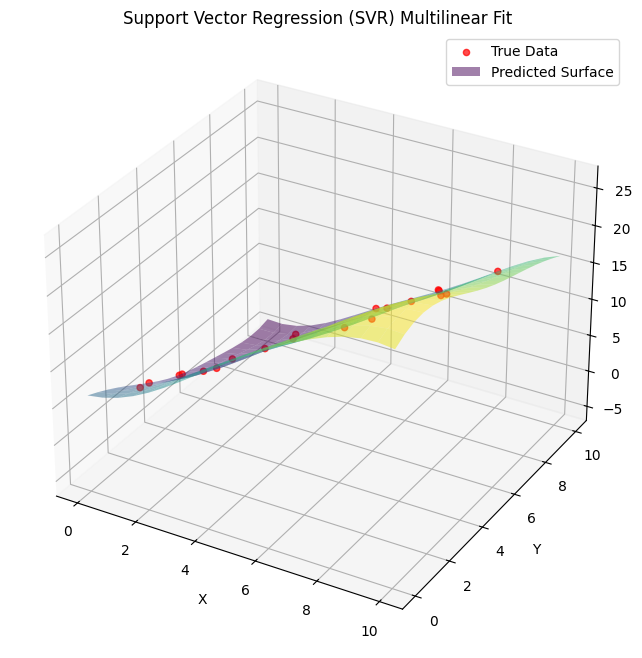

In [3]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data
np.random.seed(42)
x_data = np.random.uniform(0, 10, 100)  # Random x data
y_data = np.random.uniform(0, 10, 100)  # Random y data

# True model: z = a*x + b*y + c + noise
a_true, b_true, c_true = 2.5, -1.3, 4.7
noise = np.random.normal(0, 0.5, 100)
z_data = a_true * x_data + b_true * y_data + c_true + noise

# Combine x and y into a single feature matrix
X = np.column_stack((x_data, y_data))

# Split the data into training and testing sets
X_train, X_test, z_train, z_test = train_test_split(X, z_data, test_size=0.2, random_state=42)

# Define and train the SVR model
svr = SVR(kernel='rbf', C=10, epsilon=0.1)  # RBF kernel with regularization
svr.fit(X_train, z_train)

# Predict using the trained model
z_pred = svr.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(z_test, z_pred)
print(f"Mean Squared Error on Test Data: {mse:.3f}")

r2 = r2_score(z_test, z_pred)
print(f"R-squared (R^2): {r2:.3f}")

# Visualize the results
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of true test data
ax.scatter(X_test[:, 0], X_test[:, 1], z_test, color='r', label='True Data', alpha=0.7)

# Predicted surface
x_grid, y_grid = np.meshgrid(np.linspace(0, 10, 20), np.linspace(0, 10, 20))
z_grid = svr.predict(np.column_stack([x_grid.ravel(), y_grid.ravel()])).reshape(x_grid.shape)
ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.5, cmap='viridis', label='Predicted Surface')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title('Support Vector Regression (SVR) Multilinear Fit')
plt.show()